In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
#file = open("3D_spatial_network.txt",'r')
#from google.colab import files
#uploaded = files.upload()
# file = open("3D_spatial_network-Copy.csv",'r')

In [0]:
from google.colab import drive
drive.mount('/content/drive')
rootpath="/content/drive/My Drive/Colab Notebooks/3D_spatial_network - Copy.csv"
data=pd.read_csv(rootpath)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data
data= data.values

In [0]:
data

array([[1.44552912e+08, 9.34984860e+00, 5.67408757e+01, 1.70527716e+01],
       [1.44552912e+08, 9.35018840e+00, 5.67406785e+01, 1.76148402e+01],
       [1.44552912e+08, 9.35054850e+00, 5.67405445e+01, 1.80835356e+01],
       ...,
       [9.33232050e+07, 9.93500950e+00, 5.74992821e+01, 1.97331406e+01],
       [9.33232090e+07, 9.94347870e+00, 5.74959190e+01, 2.40270150e+01],
       [9.33232090e+07, 9.94345120e+00, 5.74962700e+01, 2.46352848e+01]])

In [0]:
#file = open("3D_spatial_network-Copy.csv",'r')
#dataset = file.read()
#temp=dataset.split("\n")



   
data=data[:,1:4]  
result=data[:,2:3]
data=data[:,0:2]

#Appending ones

In [0]:
data

array([[ 9.3498486, 56.7408757],
       [ 9.3501884, 56.7406785],
       [ 9.3505485, 56.7405445],
       ...,
       [ 9.9350095, 57.4992821],
       [ 9.9434787, 57.495919 ],
       [ 9.9434512, 57.49627  ]])

In [0]:
#Appending ones
data=np.append(arr=np.ones((len(data),1)),values=data,axis=1)#1
data=np.append(arr=data[:,1:2]*data[:,2:3],values=data,axis=1)#xy
data=np.append(arr=data[:,3:4]**2,values=data,axis=1)#y2
data=np.append(arr=data[:,3:4]**2,values=data,axis=1)#x2

data=np.append(arr=data[:,1:2]*data[:,5:6],values=data,axis=1)#y3
data=np.append(arr=data[:,2:3]*data[:,5:6],values=data,axis=1)#xy2
data=np.append(arr=data[:,2:3]*data[:,7:8],values=data,axis=1)#x2y
data=np.append(arr=data[:,3:4]*data[:,7:8],values=data,axis=1)#x3

data=np.append(arr=data[:,3:4]*data[:,9:10],values=data,axis=1)#y4
data=np.append(arr=data[:,4:5]*data[:,9:10],values=data,axis=1)#xy3
data=np.append(arr=data[:,6:7]*data[:,7:8],values=data,axis=1)#x2y2
data=np.append(arr=data[:,4:5]*data[:,11:12],values=data,axis=1)#x3y
data=np.append(arr=data[:,8:9]**2,values=data,axis=1)#x4

data=np.append(arr=data[:,8:9]*data[:,10:11],values=data,axis=1)#y5
data=np.append(arr=data[:,4:5]*data[:,15:16],values=data,axis=1)#xy4
data=np.append(arr=data[:,5:6]*data[:,15:16],values=data,axis=1)#x2y3
data=np.append(arr=data[:,4:5]*data[:,17:18],values=data,axis=1)#x3y2
data=np.append(arr=data[:,4:5]*data[:,18:19],values=data,axis=1)#x4y
data=np.append(arr=data[:,10:11]*data[:,14:15],values=data,axis=1)#x5

data=np.append(arr=data[:,14:15]**2,values=data,axis=1)#y6
data=np.append(arr=data[:,5:6]*data[:,21:22],values=data,axis=1)#xy5
data=np.append(arr=data[:,5:6]*data[:,22:23],values=data,axis=1)#x2y4
data=np.append(arr=data[:,5:6]*data[:,23:24],values=data,axis=1)#x3y3
data=np.append(arr=data[:,5:6]*data[:,24:25],values=data,axis=1)#x4y2
data=np.append(arr=data[:,5:6]*data[:,25:26],values=data,axis=1)#x5y
data=np.append(arr=data[:,25:26]**6,values=data,axis=1)#x6

In [0]:
traindata,testdata,trainresult,testresult=train_test_split(data,result,test_size=0.3)
len_of_terms=28
le=len_of_terms

avg=[0]*le
std=[0]*le
for i in range(0,le):
    avg[i]=np.mean(traindata[:,i:i+1])
    std[i]=np.std(traindata[:,i:i+1])
    if std[i]!=0:
        traindata[:,i]=(traindata[:,i]-avg[i])/std[i]
        testdata[:,i]=(testdata[:,i]-avg[i])/std[i]

for i in range(0,1):
    avg[i]=np.mean(trainresult[:,i:i+1])
    std[i]=np.std(trainresult[:,i:i+1])
    if std[i]!=0:
        trainresult[:,i]=(trainresult[:,i]-avg[i])/std[i]
        testresult[:,i]=(testresult[:,i]-avg[i])/std[i]

In [0]:
y_bar=0
for i in range(0,len(trainresult[:,0])):
    y_bar+=trainresult[i][0]
aa=np.std(trainresult[:,0])
y_bar/=len(trainresult[:,0])
sst=0
for i in range(0,len(trainresult[:,0])):
    sst+=(trainresult[i][0]-y_bar)**2
sst/=2
 
w=np.empty((1,le))
w.fill(0)
   #best-0.000002
error_per_iteration=np.zeros((300,1))

In [0]:
w=[[-1.68858927e-01, -1.10761127e-01, -5.61028693e-02, -6.11277666e-03,
   3.64653212e-02,  6.09688249e-02 ,-3.92843863e-02, -1.08440396e-01,
  -5.33068534e-02, -2.60652554e-03 , 4.12206852e-02 , 6.84836957e-02,
  -4.01861375e-02 ,-5.03951409e-02 , 1.05453237e-03 , 4.62302117e-02,
   7.67102105e-02 ,-4.10995451e-02 , 4.87271140e-03 , 5.14956346e-02,
   8.56713907e-02, -4.20245001e-02,  5.70155582e-02 ,-4.29608924e-02,
   9.53646910e-02 ,-2.75729186e-15,  1.05749612e-01 ,-4.39086116e-02]]
w=np.array(w)
print(w)

[[-1.68858927e-01 -1.10761127e-01 -5.61028693e-02 -6.11277666e-03
   3.64653212e-02  6.09688249e-02 -3.92843863e-02 -1.08440396e-01
  -5.33068534e-02 -2.60652554e-03  4.12206852e-02  6.84836957e-02
  -4.01861375e-02 -5.03951409e-02  1.05453237e-03  4.62302117e-02
   7.67102105e-02 -4.10995451e-02  4.87271140e-03  5.14956346e-02
   8.56713907e-02 -4.20245001e-02  5.70155582e-02 -4.29608924e-02
   9.53646910e-02 -2.75729186e-15  1.05749612e-01 -4.39086116e-02]]


In [0]:
lamda=0.002
eta=1e-7
for iterate in range(245,300):
    print(iterate)
    print(w)
    sum_w=np.zeros((1,le))
    for row in range(0,len(traindata)):
        
        for j in range(0,le):
            sum_w[0][j]+=(traindata[row][j]*((np.dot(traindata[row],w.T))-trainresult[row][0]))
        
        for i in range(0,le):
                
            sum_w[0][i]+=2*lamda*w[0][i]
                
        

    for j in range(0,le):
        w[0][j]-=eta*(sum_w[0][j])

    
    error_sum=0
    for row in range(0,len(traindata)):
        error_sum+=(((np.dot(traindata[row],w.T))-trainresult[row][0])**2)
    error_sum/=2
    print(error_sum)
    error_per_iteration[iterate]=error_sum
    sse=error_sum
    r2=1-(sse/sst)
    print(r2)
    print("\n")

245
[[-1.43458978e-01 -9.38999978e-02 -4.72347120e-02 -4.55050941e-03
   3.17020045e-02  5.19901409e-02 -3.81249534e-02 -9.17790748e-02
  -4.46881520e-02 -1.36651820e-03  3.60072730e-02  5.87627415e-02
  -3.88570074e-02 -4.20406002e-02  1.95344600e-03  4.05379474e-02
   6.61727658e-02 -3.95986059e-02  5.41115066e-03  4.52952280e-02
   7.42412211e-02 -4.03496597e-02  5.02774865e-02 -4.11100787e-02
   8.29663587e-02 -2.58082584e-15  9.23125850e-02 -4.18797724e-02]]
[145191.37599371]
[0.04608325]


246
[[-1.43952782e-01 -9.42284505e-02 -4.74080376e-02 -4.58168223e-03
   3.17942753e-02  5.21650221e-02 -3.81480059e-02 -9.21034772e-02
  -4.48564589e-02 -1.39124940e-03  3.61084883e-02  5.89522963e-02
  -3.88831805e-02 -4.22036039e-02  1.93552045e-03  4.06486635e-02
   6.63784369e-02 -3.96279390e-02  5.40040487e-03  4.54160105e-02
   7.44644878e-02 -4.03821915e-02  5.04089045e-02 -4.11458478e-02
   8.32086816e-02 -2.58433244e-15  9.25753245e-02 -4.19188170e-02]]
[145182.08673577]
[0.04614428]


In [0]:
error_per_iteration


array([[151546.96413362],
       [151012.20060373],
       [150575.50618495],
       [150217.98635486],
       [149924.50835645],
       [149682.8446286 ],
       [149483.10645387],
       [149317.29585848],
       [149178.94398934],
       [149062.81870864],
       [148964.68811144],
       [148881.12926702],
       [148809.37353478],
       [148747.18146035],
       [148692.74159479],
       [148644.58866206],
       [148601.53737461],
       [148562.62890462],
       [148527.08759069],
       [148494.28592268],
       [148463.7162217 ],
       [148434.96773484],
       [148407.70810938],
       [148381.66840892],
       [148356.6309941 ],
       [148332.41972036],
       [148308.89200944],
       [148285.93243656],
       [148263.44754338],
       [148241.36164236],
       [148219.61342304],
       [148198.15320688],
       [148176.94072671],
       [148155.94333041],
       [148135.13452786],
       [148114.49281543],
       [148094.00072503],
       [148073.64405477],
       [1480

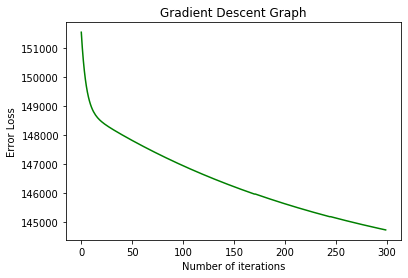

In [0]:
store_err=error_per_iteration
#err=error_per_iteration[:300,:]
err=[error_per_iteration[i] for i in range(0,300)]
iteration_num = [(i) for i in range(0,300)]
plt.plot(iteration_num,err, color='g')
plt.xlabel('Number of iterations')
plt.ylabel('Error Loss')
plt.title('Gradient Descent Graph')
plt.show()

In [0]:
X_train=traindata
X_test=testdata
Y_train=trainresult
Y_test=testresult
w=w.T

predict=np.zeros((1,len(X_train)))
for row in range(0,len(X_train)):
    predict[0][row]=(np.dot(X_train[row],w))
predict=np.transpose(predict)

y_bar=0
for i in range(0,len(Y_train[:,0])):
    y_bar+=Y_train[i][0]
sst=0
for i in range(0,len(Y_train[:,0])):
    sst+=(Y_train[i][0]-y_bar)**2
sst/=2

sse=0
for i in range(0,len(Y_train[:,0])):
    sse+=(Y_train[i][0]-predict[i][0])**2
sse/=2
r2=1-(sse/sst)
print(r2)
print("\n")


rms=(sse/len(Y_train[:,0]))**0.5

print(rms)
print("\n")

0.048821323116021165


0.6896298561126808




In [0]:
X_train=traindata
X_test=testdata
Y_train=trainresult
Y_test=testresult


predict=np.zeros((1,len(X_test)))
for row in range(0,len(X_test)):
    predict[0][row]=(np.dot(X_test[row],w))
predict=np.transpose(predict)

y_bar=0
for i in range(0,len(Y_test[:,0])):
    y_bar+=Y_test[i][0]
sst=0
for i in range(0,len(Y_test[:,0])):
    sst+=(Y_test[i][0]-y_bar)**2
sst/=2

sse=0
for i in range(0,len(Y_test[:,0])):
    sse+=(Y_test[i][0]-predict[i][0])**2
sse/=2
r2=1-(sse/sst)
print(r2)
print("\n")


rms=(sse/len(Y_test[:,0]))**0.5

print(rms)
print("\n")

0.999995927529365


0.6869953484781494


